In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dataset = 'BigEarthNet'
dataset = 'EuroSAT'
dataset = 'So2Sat' 
# dataset = 'OSCD'
models = []
names = []
# models += ['vit_base_patch16_224']
models += ['cvit_base_patch16_224']
# models += ['cvit_p1_base_patch16_224']
# models += ['mm_cvit_base_patch16_224']
# names += ['mae_vit_v2']
# names += ['mae_cvit_v2']
# names += ['mae_base']
# names += ['mae_vit_btnk']
metric = 'micro_mAP' if dataset == 'BigEarthNet' else 'accuracy'
if dataset == 'OSCD':
    # metric = 'precision'
    metric = 'f1'
    # metric = 'recall'

In [3]:
log_path = './results/logs/'
all_logs = os.listdir(log_path)
target_logs = [log for log in all_logs if dataset in log and any([model in log for model in models])]
# print(len(target_logs))
target_logs

['So2Sat_mm_cvit_base_patch16_224_mae_mm_cvit_1-2-9',
 'So2Sat_cvit_base_patch16_224_mae_cvit_0-12-0',
 'So2Sat_cvit_base_patch16_224_mae_cvit_1-2-9',
 'So2Sat_cvit_base_patch16_224_mae_cvit_0-0-12']

In [6]:
df_all = pd.DataFrame()
for target_log in target_logs:
    name = '_'.join(target_log.split('_')[-3:])
    try:
        path = f'./results/logs/{target_log}/ft_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
# df_all.sort_values(by=[metric], inplace=True)
# get the best lr for each model
df_all_best = df_all.loc[df_all.groupby('model')[metric].idxmax()]
print(len(df_all))
df_all_best.sort_values(by=[metric])
df_all

10


,epochs,lr,weight_decay,ce,loss,accuracy,epoch,num_samples,model
0,10,0.00500,0.000500,1.521374,1.521374,0.523920,10,48307,mm_cvit_1-2-9
1,10,0.00005,0.000500,1.647469,1.647469,0.638603,10,48307,mm_cvit_1-2-9
2,10,0.00050,0.000500,2.119354,2.119354,0.651293,10,48307,mm_cvit_1-2-9
3,20,0.00500,0.000500,1.712673,1.712673,0.469559,20,48307,mae_cvit_1-2-9
4,20,0.00008,0.000500,1.251249,1.251249,0.635539,20,48307,mae_cvit_1-2-9
5,20,0.00010,0.000500,1.263983,1.263983,0.639617,20,48307,mae_cvit_1-2-9
6,20,0.00030,0.000500,1.499891,1.499891,0.641791,20,48307,mae_cvit_1-2-9
7,20,0.00100,0.000500,1.633362,1.633362,0.644006,20,48307,mae_cvit_1-2-9
8,20,0.00050,0.000005,1.541744,1.541744,0.645269,20,48307,mae_cvit_1-2-9
9,20,0.00050,0.000500,1.544194,1.544194,0.649678,20,48307,mae_cvit_1-2-9


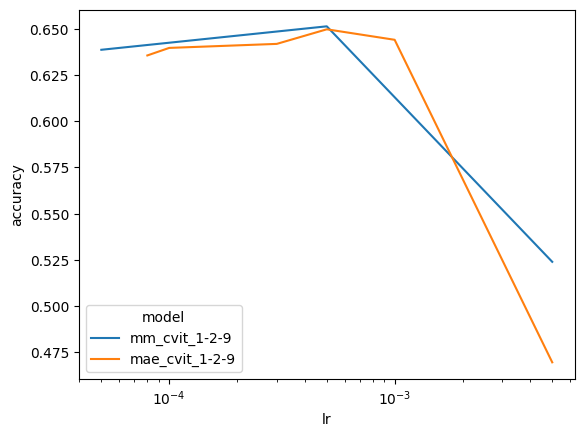

In [5]:
sns.lineplot(data=df_all.loc[df_all.weight_decay==5e-4], x='lr', y=metric, hue='model')
# set x axis log scale
plt.xscale('log')

In [12]:
df_all = pd.DataFrame()
for target_log in target_logs:
    name = '_'.join(target_log.split('_')[-3:])
    try:
        path = f'./results/logs/{target_log}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
# df_all.sort_values(by=[metric], inplace=True)
# get the best lr for each model
df_all_best = df_all.loc[df_all.groupby('model')[metric].idxmax()]
df_all
df_all_best.sort_values(by=[metric])

,epochs,lr,weight_decay,ce,loss,accuracy,epoch,num_samples,model
9,100,0.07,0,1.360929,1.360929,0.576190,100,48307,mae_cvit_0-12-0
30,100,0.09,0,1.313506,1.313506,0.590080,100,48307,mae_cvit_0-0-12
20,100,0.05,0,1.222670,1.222670,0.605171,100,48307,mae_cvit_1-2-9


<Axes: xlabel='lr', ylabel='accuracy'>

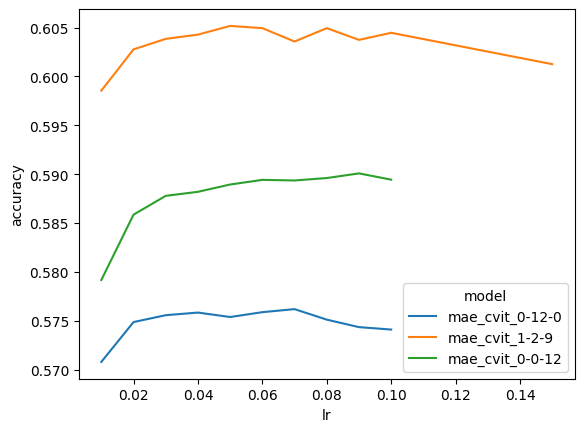

In [13]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')

In [24]:
# parse the model name in the df_all_best
df = df_all_best.copy()
df['model'] = df['model'].apply(lambda x: x.split('_')[-1])
df['spectral'] = df['model'].apply(lambda x: x.split('-')[0])
df['spatial_spectral'] = df['model'].apply(lambda x: x.split('-')[1])
df[metric] *= 100

Text(0.5, 1.0, 'So2Sat LP accuracy (%)')

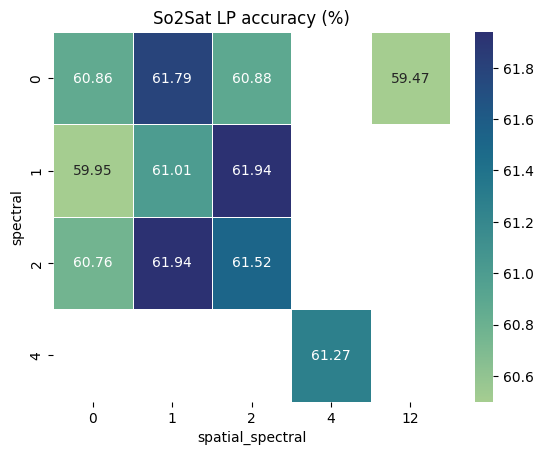

In [39]:
# drop the heatmap of df_all_best_cvit, x: spatial_spectral, y: spectral, hue: metric
df_attn = df.pivot(index='spectral', columns='spatial_spectral', values=metric)
column_order = ['0', '1', '2', '4', '12']  # replace with your desired order
df_attn = df_attn.reindex(column_order, axis=1)
sns.heatmap(df_attn, annot=True, fmt=".2f", cmap='crest', linewidth=.5, vmin=60.5)
plt.title(f'{dataset} LP {metric} (%)')

spatial_spectral,0,1,2,4,12
spectral,,,,,
0,94.518519,94.740741,94.203704,NaN,93.518519
1,94.444444,93.907407,94.685185,NaN,NaN
2,92.666667,94.018519,94.296296,NaN,NaN
4,NaN,NaN,NaN,94.388889,NaN


In [22]:
df_all_best_cvit.pivot()

TypeError: DataFrame.pivot() takes 1 positional argument but 2 were given